<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Claudia Estefania Meza Fonseca y Cristina Lobera De la Mora

**Fecha:** 12 de octubre del 2021.

**Expediente** : if714997 y .
**Profesor:** Oscar David Jaramillo Zuluaga.
    

# Tarea 6

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

**Solución Cristina**

In [1]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

[1.875] [1.875]


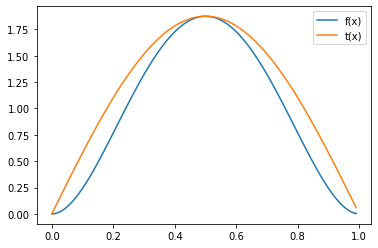

In [2]:
f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.sin(x*np.pi) 
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01) 
print(max_f,max_t)
# Gráficas 
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

**Solucion Estefania**

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

$$a=0$$

$$b=1$$

$$g(x)=\frac{f(x)}{c}$$

$$c = \int_{-\infty}^{\infty} t(x) dx$$.

$$ c=\int_{a}^{b} t(x)  dx$$

$$ c=\int_{0}^{1} t(x)  dx$$

$$c= \int_{0}^{1} a \sin(\pi x) dx$$

$$c= \frac{2a}{\pi} $$

$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$

**Solución Estefania**

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

**Solución Cristina**
$$G(x) = \int g(x)dx $$
 
 $$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$

$$ u = \frac{1}{2}(- \cos(\pi x)+1) $$

$$ 2u = (- \cos(\pi x)+1) $$

$$ 2u-1 = - \cos(\pi x) $$

$$ \cos^{-1}(-2u+1) = \pi x$$

$$x= \frac{\cos^{-1}(-2u+1)}{\pi}$$

**Solución Estefania**

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
<img src="captura6.png">

**Solucion Cristina**

**Solucion Estefania**

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
<img src="captura7.png">

**Solucion Cristina**

In [8]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    q = 0
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]     

El máximo de f es: [1.875]


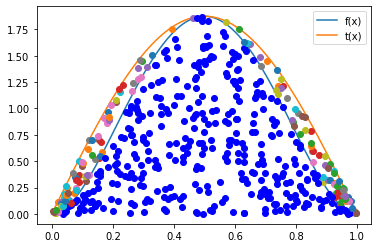

In [9]:
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

N = 500 
R2 = np.random.rand(N)
R1 = np.random.rand(N) 

quantity_sin = Acep_rechazo(R2,R1,f,t)

**Solucion Estefania**

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

**Solucion Cristina**

In [10]:
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

f = lambda x:30*(x**2-2*x**3+x**4)
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t1= lambda x: max_f*np.sin(x*np.pi) 
t2= lambda x: max_f*np.ones(len(x))  
x = np.arange(0,1,0.01)  

# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de', sum(Acep_rechazo2(R2,R1,f,t1))/N)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de ', sum(Acep_rechazo2(R2,R1,f,t2))/N)

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante es de 0.69
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal es de  0.544


**Solucion Estefania**

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

**Solucion Cristina**

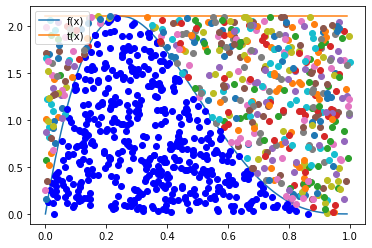

In [11]:
f = lambda x:20*x*(1-x)**3
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
t = lambda x: max_f*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 1000 
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

**Solucion Estefania**

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$

Demuestre matemáticamente que 
$$P(k+1)=\frac{\lambda}{k+1}P(k)$$
y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

**Solución Cristina**
$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} k!}{(k+1)!e^{-\lambda}\lambda^k}$$

$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^{k+1} 1}{e^{-\lambda}\lambda^k ( k + 1)}$$


$$\frac{P(k+1)}{P(k)} = \frac{\lambda^{k+1} 1}{\lambda^k ( k + 1)}$$

$$\frac{P(k+1)}{P(k)} = \frac{\lambda}{( k + 1)}$$

$$P(k+1) = \frac{\lambda P(k)}{( k + 1)}$$

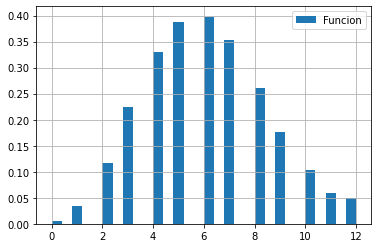

In [12]:
def Poisson(k,l):
    global pr
    pr = np.zeros(k)
    pr[0] = np.exp(-l)
    def Pr(i):
        global pr
        pr[i+1]=l/(i+1)*pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [Pr(i) for i in range(k-1)]
    return np.cumsum(pr)
N = 10000; n = 12; l = 6
u = np.random.rand(N)
p_acum = Poisson(n,l)

dist = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.figure(figsize = [6,4])
plt.hist(dist, 30, density=True, label='Funcion')
plt.grid()
plt.legend()

**Solucion Estefania**